In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Trendanalysis for temperature and percipitation

This notebook will aid in the search for a significant trend in temperature and percipitation data. Therefore the three nearest weather stations to the flood-area are connsidered (Bad Neuenahr-Ahrweiler, Koenigswinter-Heiderdorf, Koeln-Bonn Airport). Only the data concerning temperature and percipitation is read, for more information about the data please refer to [DWD-Documentation](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/historical/DESCRIPTION_obsgermany_climate_monthly_kl_historical_en.pdf)

In [190]:
columns_to_read = ["STATIONS_ID", "MESS_DATUM_BEGINN", "MO_RR", "MO_TN", "MO_TT", "MO_TX"]
data_neuenahr = pd.read_csv("Data/month_3490.txt", sep=";", usecols=columns_to_read)
data_koenigswinter = pd.read_csv("Data/month_603.txt", sep=";", usecols=columns_to_read)
data_koeln = pd.read_csv("Data/month_2667.txt", sep=";", usecols=columns_to_read)
data_neuenahr.head()

,STATIONS_ID,MESS_DATUM_BEGINN,MO_TT,MO_TX,MO_TN,MO_RR
0,3490,19291101,5.3,-999.0,1.0,-999.0
1,3490,19291201,6.4,-999.0,-999.0,-999.0
2,3490,19300101,4.2,-999.0,0.8,-999.0
3,3490,19300201,1.8,-999.0,-2.3,-999.0
4,3490,19300301,5.3,-999.0,0.8,-999.0


Renaming of the columns for better usability. For more information on the abbreviations please refer to the above mentioned documentation

In [193]:
mapping = {
    "MO_RR": "Percipitation", 
    "MO_TN": "MinmalTemperature", 
    "MO_TT": "AverageTemperature", 
    "MO_TX": "MaximalTemperature",
    "STATIONS_ID": "StationID",
    "MESS_DATUM_BEGINN": "BeginOfMonth"
}

In [194]:
data_neuenahr = data_neuenahr.rename(mapping, axis=1)
data_koenigswinter = data_koenigswinter.rename(mapping, axis=1)
data_koeln = data_koeln.rename(mapping, axis=1)
data_neuenahr.head()

,StationID,BeginOfMonth,AverageTemperature,MaximalTemperature,MinmalTemperature,Percipitation
0,3490,19291101,5.3,-999.0,1.0,-999.0
1,3490,19291201,6.4,-999.0,-999.0,-999.0
2,3490,19300101,4.2,-999.0,0.8,-999.0
3,3490,19300201,1.8,-999.0,-2.3,-999.0
4,3490,19300301,5.3,-999.0,0.8,-999.0


Drop all rows where percipitation is not present, as this is the main focus of the analysis. In this dataset values that are not known are marked with '-999.0'. Also all rows with percipitation < 0 are dropped, as this is not possible.

In [195]:
data_neuenahr = data_neuenahr.drop(data_neuenahr[data_neuenahr["Percipitation"]<0].index).dropna(subset=["Percipitation"])
data_koenigswinter = data_neuenahr.drop(data_neuenahr[data_neuenahr["Percipitation"]<0].index).dropna(subset=["Percipitation"])
data_koeln = data_neuenahr.drop(data_neuenahr[data_neuenahr["Percipitation"]<0].index).dropna(subset=["Percipitation"])

Next all relevant data columns are converted to the right data type. The date column is formated accordingly, to correctly display any plots

In [197]:
columns_to_types = {
    "Percipitation": "float64", 
    "MinmalTemperature": "float64", 
    "AverageTemperature": "float64", 
    "MaximalTemperature": "float64"
}
data_neuenahr = data_neuenahr.astype(columns_to_types)
data_koenigswinter = data_koenigswinter.astype(columns_to_types)
data_koeln = data_koeln.astype(columns_to_types)

data_neuenahr["BeginOfMonth"] = pd.to_datetime(data_neuenahr["BeginOfMonth"], format="%Y%m%d")
data_koenigswinter["BeginOfMonth"] = pd.to_datetime(data_koenigswinter["BeginOfMonth"], format="%Y%m%d")
data_koeln["BeginOfMonth"] = pd.to_datetime(data_koeln["BeginOfMonth"], format="%Y%m%d")
data_neuenahr.head()

,StationID,BeginOfMonth,AverageTemperature,MaximalTemperature,MinmalTemperature,Percipitation
14,3490,1931-01-01,3.1,-999.0,0.2,78.4
15,3490,1931-02-01,0.5,-999.0,-3.3,54.2
16,3490,1931-03-01,2.4,-999.0,-3.1,8.3
17,3490,1931-04-01,7.1,-999.0,1.8,69.9
18,3490,1931-05-01,15.2,-999.0,8.8,109.5


Lastly the data is combined into one dataframe for easier plotting and analysis

In [218]:
full_data = pd.merge(data_neuenahr.drop("StationID", axis=1), data_koenigswinter.drop("StationID", axis=1), how ="outer", on="BeginOfMonth", suffixes=("_neuenahr", "_koenigswinter"))
full_data = pd.merge(full_data, data_koeln.drop("StationID", axis=1), how ="outer", on="BeginOfMonth", suffixes=("", "_koeln"))
full_data = full_data.rename({"AverageTemperature": "AverageTemperature_koeln", 
                              "MaximalTemperature": "MaximalTemperature_koeln", 
                              "MinmalTemperature": "MinmalTemperature_koeln",
                              "Percipitation": "Percipitation_koeln"
                             }, axis=1)
full_data.head()

,BeginOfMonth,AverageTemperature_neuenahr,MaximalTemperature_neuenahr,MinmalTemperature_neuenahr,Percipitation_neuenahr,AverageTemperature_koenigswinter,MaximalTemperature_koenigswinter,MinmalTemperature_koenigswinter,Percipitation_koenigswinter,AverageTemperature_koeln,MaximalTemperature_koeln,MinmalTemperature_koeln,Percipitation_koeln
0,1931-01-01,3.1,-999.0,0.2,78.4,3.1,-999.0,0.2,78.4,3.1,-999.0,0.2,78.4
1,1931-02-01,0.5,-999.0,-3.3,54.2,0.5,-999.0,-3.3,54.2,0.5,-999.0,-3.3,54.2
2,1931-03-01,2.4,-999.0,-3.1,8.3,2.4,-999.0,-3.1,8.3,2.4,-999.0,-3.1,8.3
3,1931-04-01,7.1,-999.0,1.8,69.9,7.1,-999.0,1.8,69.9,7.1,-999.0,1.8,69.9
4,1931-05-01,15.2,-999.0,8.8,109.5,15.2,-999.0,8.8,109.5,15.2,-999.0,8.8,109.5


## Trendanalysis for Temperature

For a first view on the data we will look at the monthy average temperature. It would be expected that you can make out a clear trend according with the known research in climate change and global warming

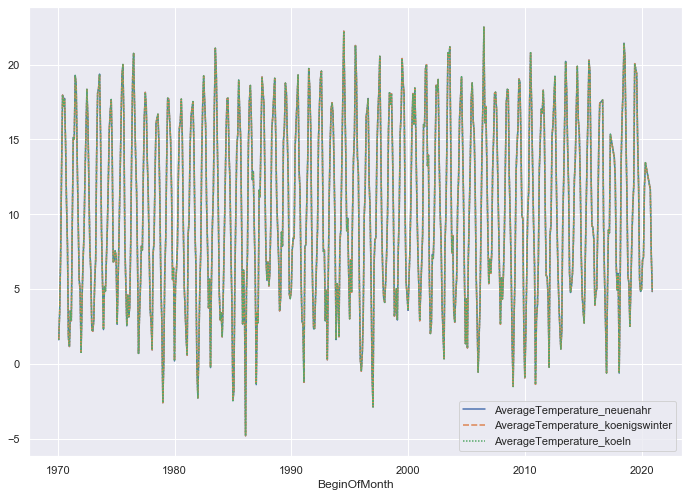

In [220]:
data = full_data[(full_data["BeginOfMonth"]>pd.to_datetime("01/01/1970"))].set_index("BeginOfMonth")[["AverageTemperature_neuenahr", "AverageTemperature_koenigswinter", "AverageTemperature_koeln"]]
data = data[data["AverageTemperature_neuenahr"]>-999.0]
sns.lineplot(data=data)

The plot shows two things simultaniously:
- The temperatures between the threee stations are very close
- There is no clear trend visible

To futher investigate we will look at the highest temperature recorded for one month. We will aggregate to a yearly level

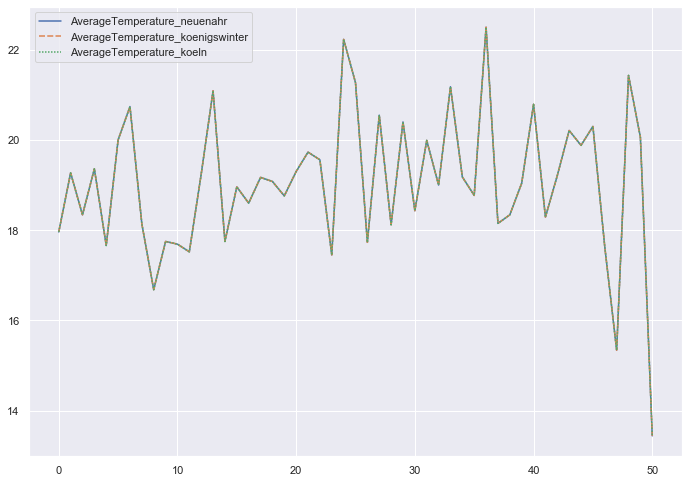

In [242]:
data = full_data[full_data["BeginOfMonth"]>pd.to_datetime("01/01/1970")].set_index("BeginOfMonth").resample("Y").max().reset_index()
data = data[["AverageTemperature_neuenahr", "AverageTemperature_koenigswinter", "AverageTemperature_koeln"]]
sns.lineplot(data=data)

In [119]:
data_3490[data_3490["MESS_DATUM_BEGINN"]>pd.to_datetime("01/01/1970")].corr()

,STATIONS_ID,Niederschlag,MinimalTmp,Durchschnittstmp,MaximalTmp
STATIONS_ID,NaN,NaN,NaN,NaN,NaN
Niederschlag,NaN,1.000000,0.276347,0.208779,0.150642
MinimalTmp,NaN,0.276347,1.000000,0.987573,0.963116
Durchschnittstmp,NaN,0.208779,0.987573,1.000000,0.991534
MaximalTmp,NaN,0.150642,0.963116,0.991534,1.000000


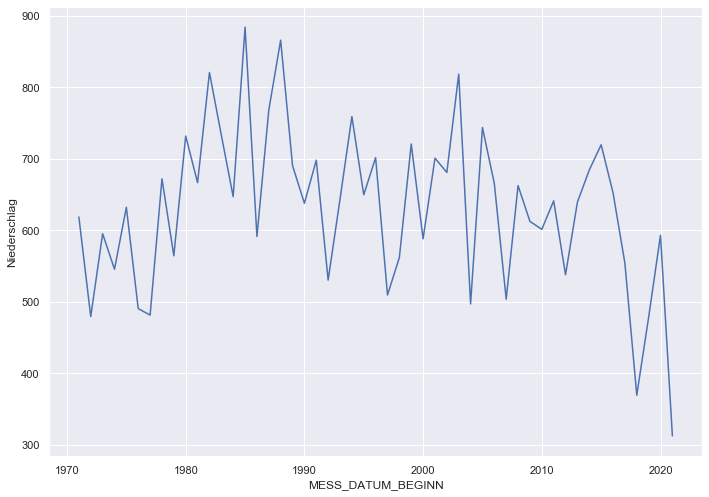

In [133]:
data_3490.set_index("MESS_DATUM_BEGINN").resample("Y").sum()
sns.lineplot(x="MESS_DATUM_BEGINN", y="Niederschlag", data=data_3490[data_3490["MESS_DATUM_BEGINN"]>pd.to_datetime("01/01/1970")].set_index("MESS_DATUM_BEGINN").resample("Y").sum().reset_index())

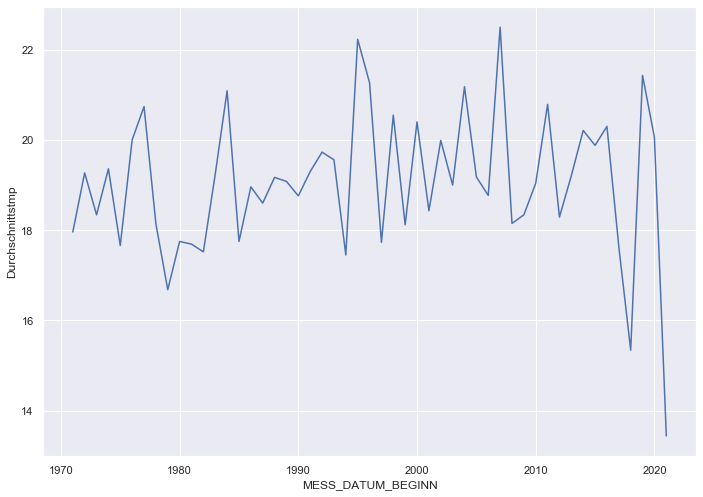

In [138]:
sns.lineplot(x="MESS_DATUM_BEGINN", y="Durchschnittstmp", data=data_3490[data_3490["MESS_DATUM_BEGINN"]>pd.to_datetime("01/01/1970")].set_index("MESS_DATUM_BEGINN").resample("Y").max().reset_index())

In [244]:
data_3490[data_3490["MESS_DATUM_BEGINN"]>pd.to_datetime("01/01/1970")].set_index("MESS_DATUM_BEGINN").resample("Y").sum()

TypeError: Invalid comparison between dtype=int64 and Timestamp

In [ ]:
- Trend in Niederschlag
- Trend Temperatur
- Korrelation TMPs > Niederschlag
- Vorhersagbarkeit Niederschlag